In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint 

https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

N - całkowita populacja

S(t) - ilość podatnych na zarażenie

I(t) - ilość chorych

R(t) - ilość ozdrowiałych

$$S\rightarrow I \rightarrow R$$

Ponadto zachodzi
$$S(t)+I(t)+R(t) = N$$

$\beta$ - współczynnik odpowiedzialny za zarażanie osobników podatnych 

$\gamma$ - współczynnik określający wyzdrowienia osobników chorych

Równania modelu:
$$\frac{dS}{dt} = -\beta \frac{S(t) I(t)}{N}$$
$$\frac{dI}{dt} = \beta \frac{S(t) I(t)}{N} - \gamma I(t)$$
$$\frac{dR}{dt} = \gamma I(t)$$

Rozwiązanie takiego układu wymaga zdefiniowania sobie wektora
$$\vec{y} = [S,I,R]$$
$$\frac{d\vec{y}}{dt} = [-\beta \frac{S I}{N}, \beta \frac{S I}{N} - \gamma I, \gamma I]$$

In [2]:
#deklaracja stałych globalnych

N = 38.5*10**6
beta = 0.8
gamma = 0.1

In [3]:
#definicja funkcji definiującej pochodną, czyli prawą stronę rozwiązywanego równania

def func(y,t):

    S, I, R = y
    
    return -beta*S*I/N, beta*S*I/N-gamma*I, gamma*I

In [4]:
# deklaracja warunków początkowych

S0 = 38*10**6
I0 = 20
R0 = 0

In [5]:
# tablica czasow

ts = np.linspace(0,150, 10000)

In [6]:
# rozwiazanie ukladu rownan z warunkami poczatkowymi
# każda kolumna to rozwiązanie dla innej zmiennej, tu w kolejności S(t), I(t), R(t)

result = odeint(func, (S0, I0, R0), ts)

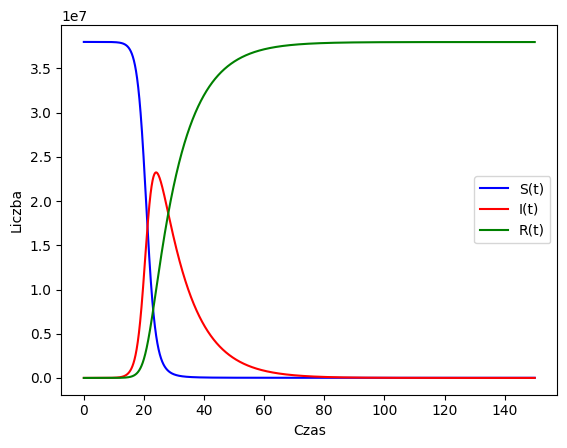

In [7]:
# rysowanie wykresu

plt.plot(ts, result[:, 0], 'b', label="S(t)") # S(t)
plt.plot(ts, result[:, 1], 'r', label="I(t)") # I(t)
plt.plot(ts, result[:, 2], 'g', label="R(t)") # R(t)
plt.ylabel("Liczba")
plt.xlabel("Czas")
plt.legend()